## Imports

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Data and EDA

In [4]:
df = pd.read_csv('data/wine_data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info() # No null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [7]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Let's plot box-plot for each feature according to Class attribute

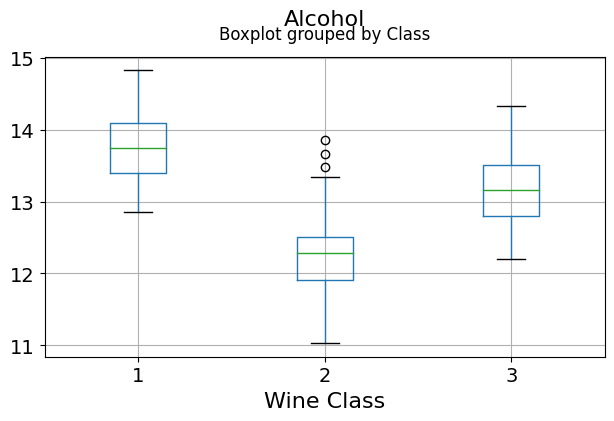

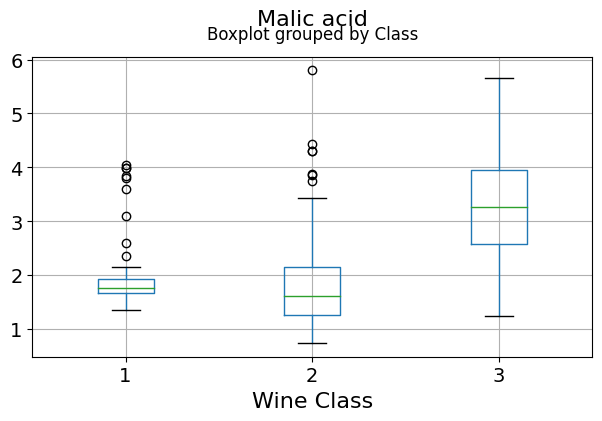

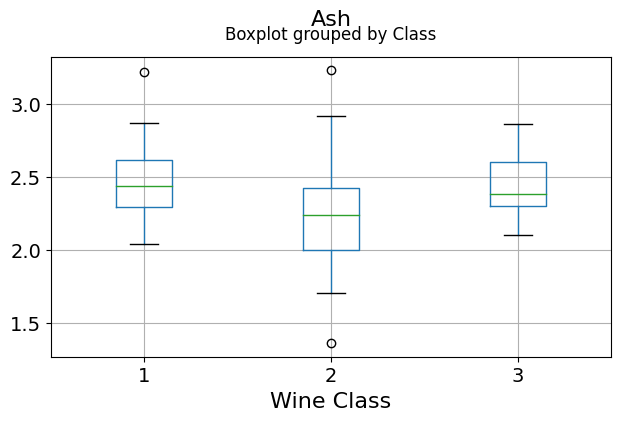

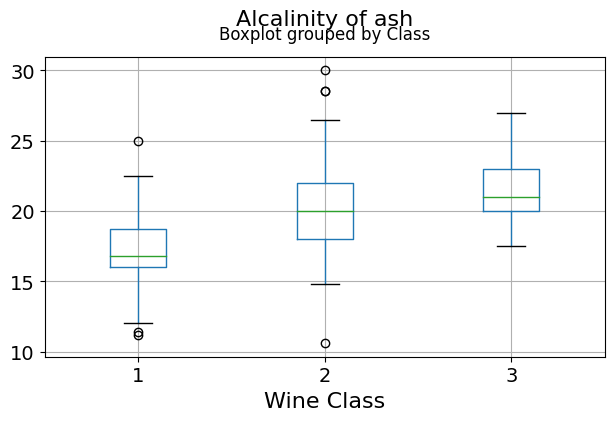

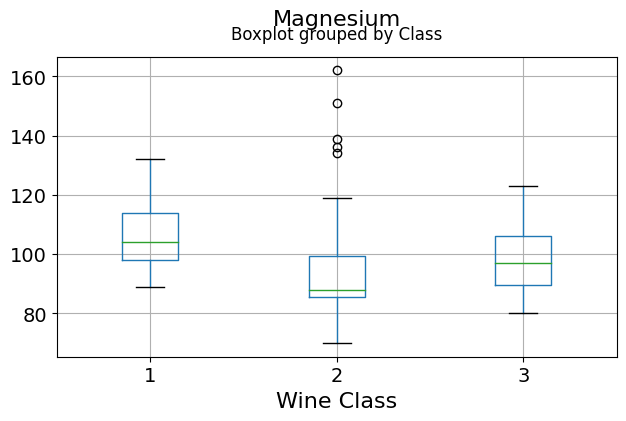

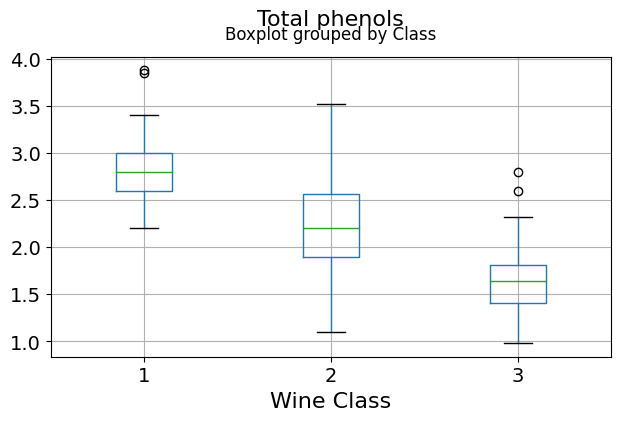

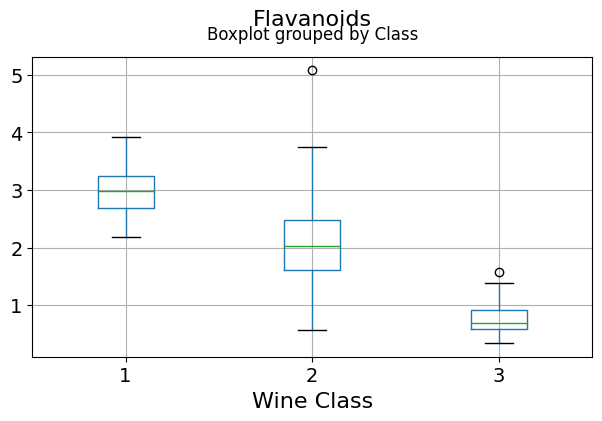

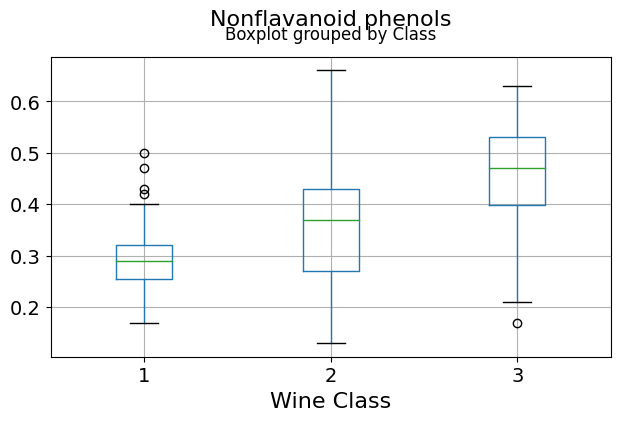

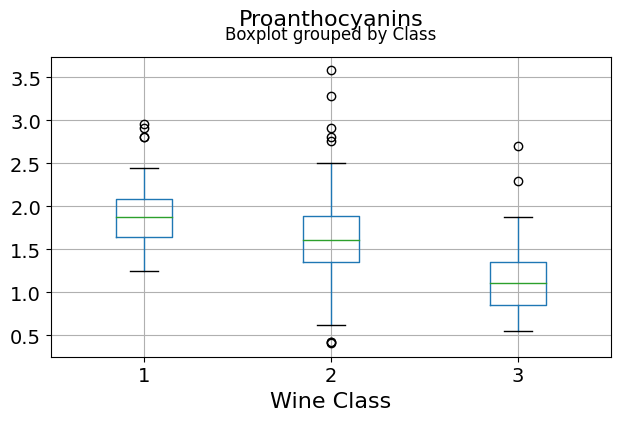

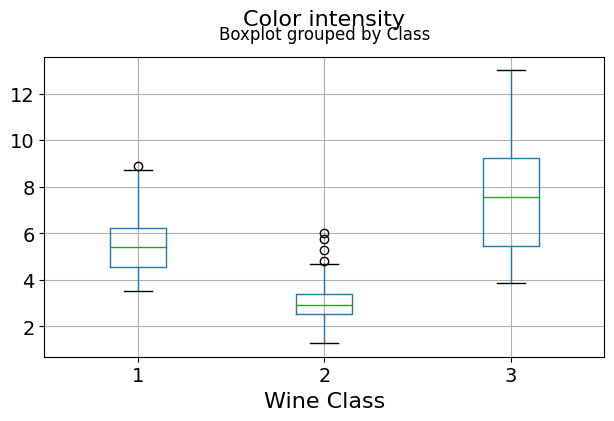

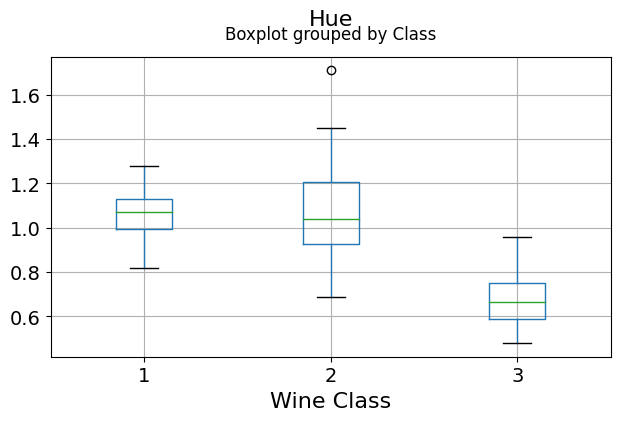

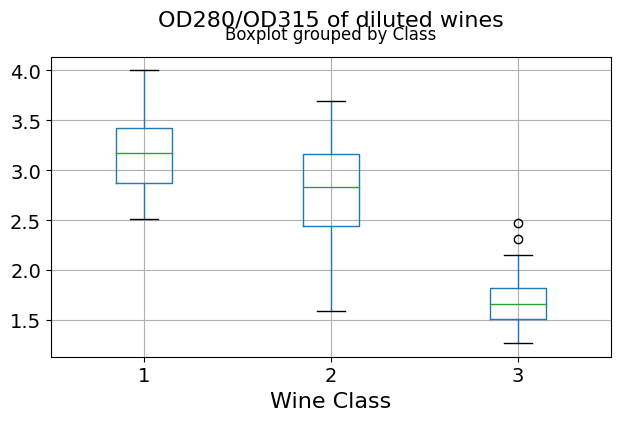

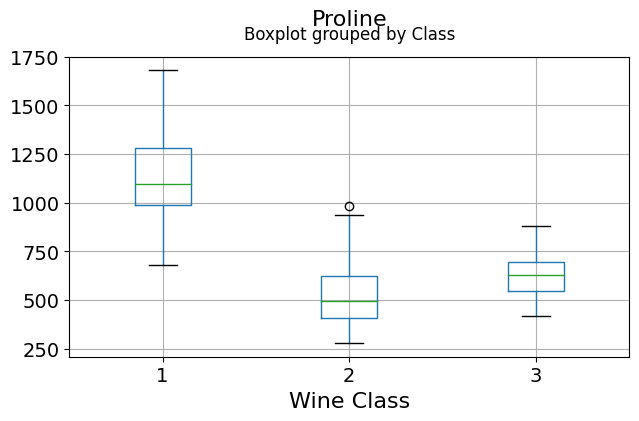

In [8]:
for c in df.columns[1:]:
    df.boxplot(c, by='Class', figsize=(7,4), fontsize=14)
    plt.title("{}\n".format(c), fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

It can be seen that some features classify the wine labels pretty clearly.

Let's try to plot class seperation using two different variables

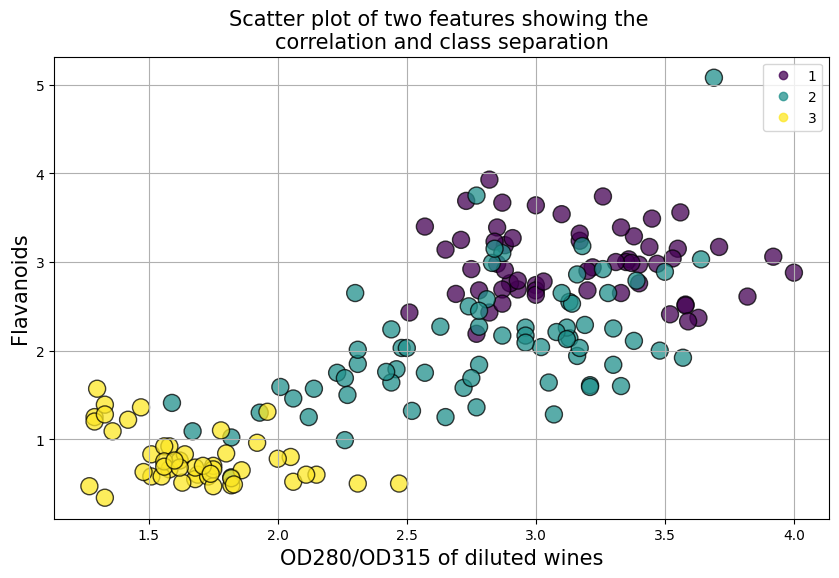

In [9]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
classes = ['1', '2', '3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Scatter plot of two features showing the \ncorrelation and class separation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

Check for co-variance matrix to see features are independent or not.

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_54043/1334566362.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


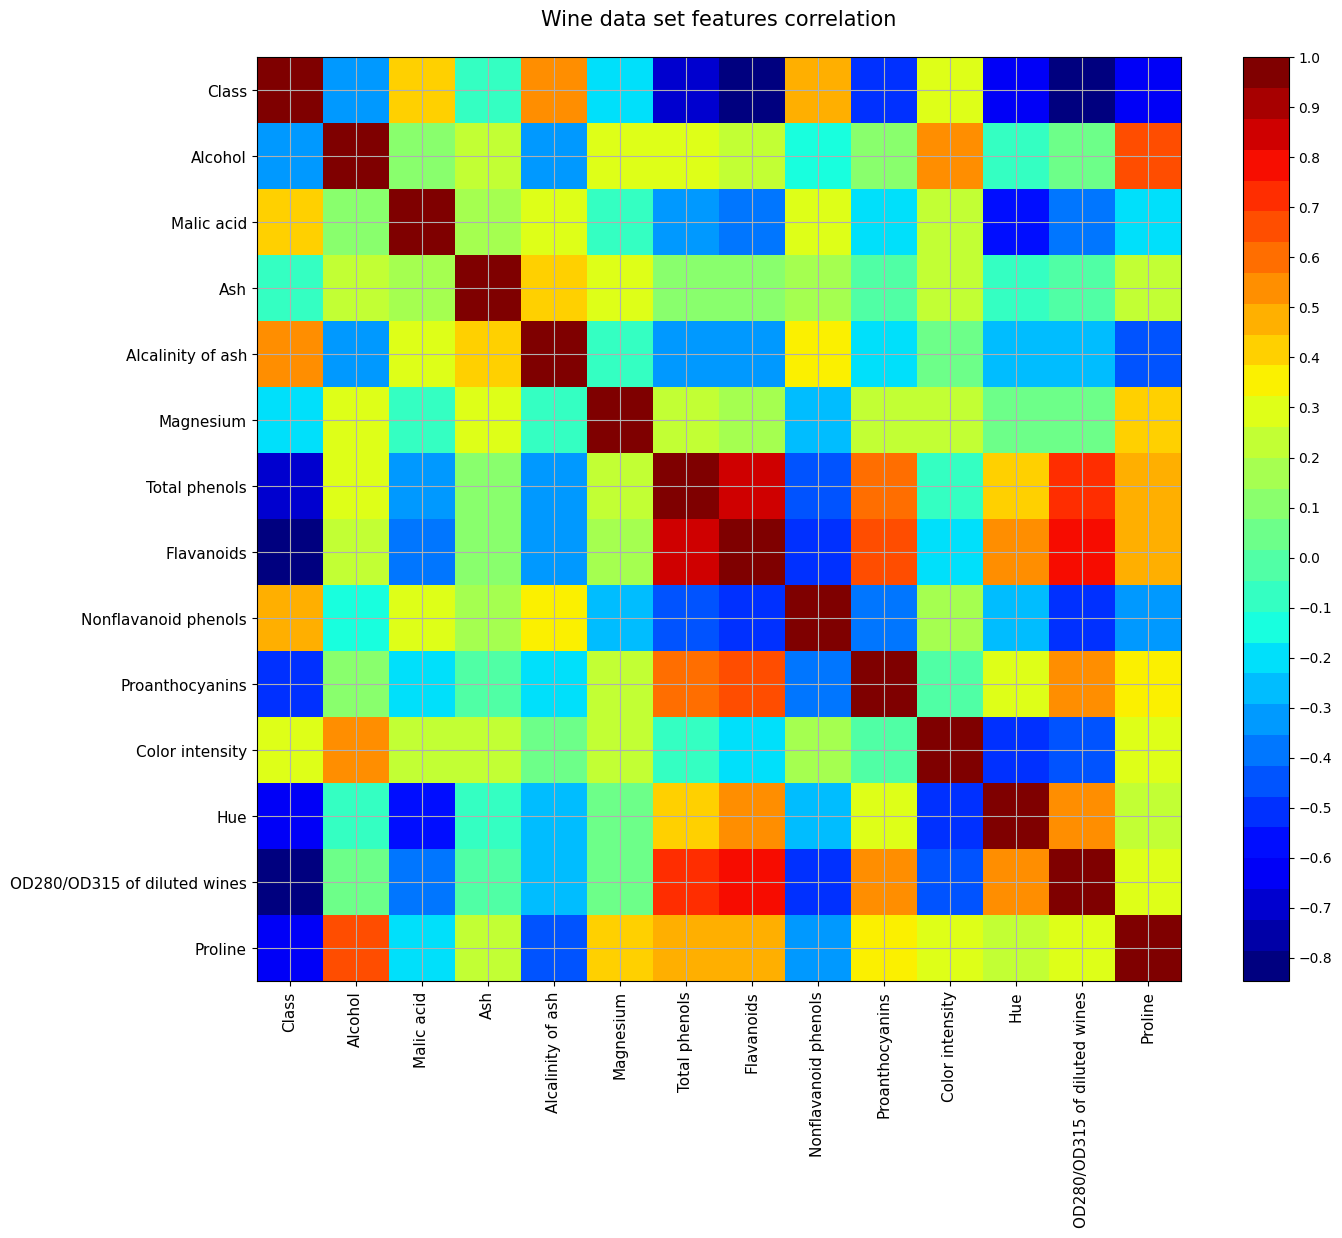

In [11]:
def correlation_matrix(df):
    
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticks(np.arange(14))
    ax1.set_xticklabels(labels,fontsize=11, rotation=90)
    ax1.set_yticks(np.arange(14))
    ax1.set_yticklabels(labels,fontsize=11)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()


correlation_matrix(df)

It can be seen that there are correlation between some features, they are not independent of each other.

## Modeling

In [13]:
# Define feature and target
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
# Split in to train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**Data Scaling** PCA requires scaling/normalization of the data to work properly

In [16]:
scaler = StandardScaler() 

In [17]:
# Scale our data
X_train_scaled = scaler.fit_transform(X_train) 
df_scaled = pd.DataFrame(data=X_train_scaled, columns=df.columns[1:])

df_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.508983,-0.488763,-1.743689,-1.054849,-0.235470,-1.043852,-0.456561,-0.226429,-0.770307,-0.563820,1.180749,-0.611317,-0.984147
1,1.339177,-0.234798,-0.318450,-0.498145,0.355295,0.972312,1.251284,-1.146615,1.426864,0.320344,1.265764,0.793811,2.574519
2,-0.096576,1.987398,0.356664,0.476087,-1.047772,-0.908438,-1.354399,0.770438,-1.288340,1.181837,-1.752276,-0.993293,-0.336220
3,0.113534,3.066751,-0.956057,0.476087,-1.047772,0.475794,0.597424,-0.533158,0.765926,-1.107921,-0.944631,0.698317,-1.142017
4,1.490923,-0.642957,0.169132,-1.166190,1.979898,0.746622,0.997547,-0.686522,1.266095,0.270468,0.373105,1.816962,1.110927


In [18]:
df_scaled.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,4.493261e-16,3.231495e-16,2.717952e-16,6.085279e-16,4.922687e-16,-4.398997e-17,-2.881605e-16,-1.688901e-16,-3.131667e-16,2.932665e-16,6.546126e-16,3.456355e-16,1.173066e-16
std,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00
min,-2.244369e+00,-1.386712e+00,-3.844041e+00,-2.557949e+00,-2.229301e+00,-1.811198e+00,-1.530063e+00,-1.836754e+00,-2.074319e+00,-1.497860e+00,-2.007322e+00,-1.798172e+00,-1.477492e+00
25%,-7.735974e-01,-6.951102e-01,-4.966045e-01,-5.398977e-01,-9.000803e-01,-9.084377e-01,-8.127685e-01,-8.207156e-01,-5.916757e-01,-8.268025e-01,-7.320934e-01,-1.047861e+00,-7.637858e-01
50%,-9.029892e-03,-4.162019e-01,-1.839931e-02,5.855894e-02,-8.777873e-02,-8.090773e-02,3.139489e-02,-2.264292e-01,-6.471189e-02,-8.773200e-02,1.178985e-02,2.822353e-01,-3.197748e-01
75%,8.781019e-01,6.812910e-01,5.817014e-01,5.874276e-01,5.583703e-01,8.594672e-01,8.560401e-01,7.704382e-01,5.828283e-01,5.583879e-01,6.175233e-01,8.245054e-01,5.937367e-01
max,2.191290e+00,3.066751e+00,3.169635e+00,2.842078e+00,2.866045e+00,2.371590e+00,2.968888e+00,2.227398e+00,3.570445e+00,2.610102e+00,3.221115e+00,1.816962e+00,2.696211e+00


In [20]:
# Call PCA and fit:

pca = PCA(n_components=None)

df_scaled_pca = pca.fit(df_scaled)

In [22]:
df_scaled_pca.explained_variance_ # This attribute contains the variance explained by each of the selected principal components
df_scaled_pca.components_ # This attribute returns the principal components themselves, which are the linear combinations of the original features.
df_scaled_pca.mean_ # This attribute stores the mean of each feature (column) from the original data. This information is used to center the data during the PCA transformation.

array([ 4.49326111e-16,  3.23149526e-16,  2.71795165e-16,  6.08527903e-16,
        4.92268700e-16, -4.39899689e-17, -2.88160481e-16, -1.68890059e-16,
       -3.13166683e-16,  2.93266459e-16,  6.54612632e-16,  3.45635470e-16,
        1.17306584e-16])

Plot the explained variance ratio for each principal compenent

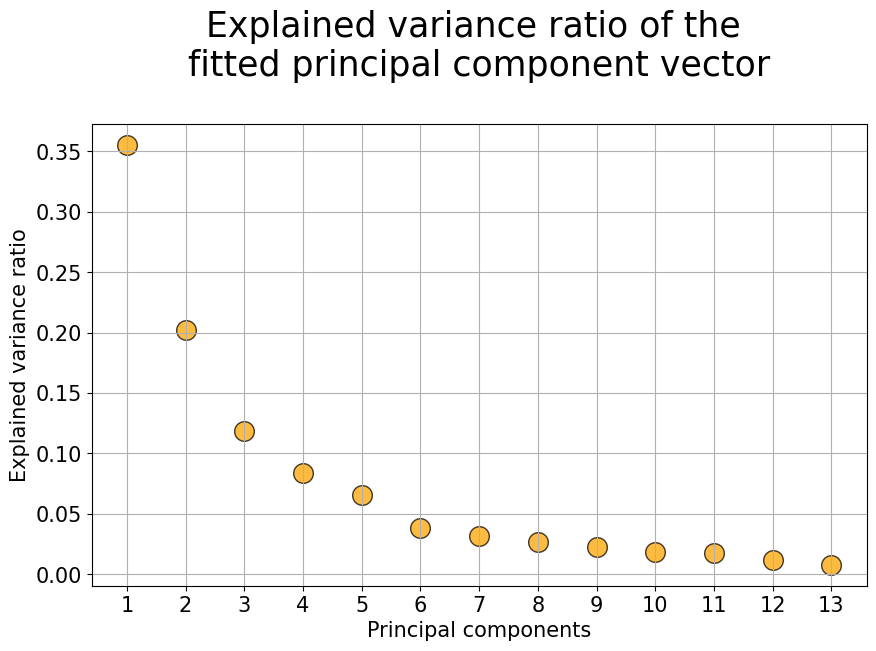

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],
            y=df_scaled_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**First principal component** explains about 36% of the total variance in the data and the **second compenent** explains further 20%.

Transform the scaled data set using the fitted PCA object

In [24]:
X_train_scaled_trans = pca.transform(df_scaled) #This method applies the dimensionality reduction to the data by projecting it onto the selected principal components.

#inverse_transform(): This method can be used to transform the reduced-dimensional data back to the original feature space.

In [25]:
# Put it into DataFrame
X_train_scaled_trans = pd.DataFrame(data=X_train_scaled_trans)
X_train_scaled_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.918530,2.154256,-1.729414,-1.004067,0.345036,0.512471,0.880191,0.444638,-0.244539,-0.587021,-0.168879,-0.627545,0.239113
1,3.558277,-1.109812,-0.455594,-0.067860,-0.576618,-0.001362,-0.381489,0.935178,0.794683,-0.013508,0.950840,-0.250442,0.304728
2,-3.331992,-1.413369,-0.251293,1.133582,-0.188701,0.173699,-0.628163,-0.671650,0.332784,-0.486285,0.096871,-0.392592,-0.143364
3,-0.336892,0.746781,-0.134886,3.521994,0.552779,1.451955,-0.988443,0.158734,-0.336253,0.096991,0.289033,0.221980,0.507133
4,3.427796,-1.365254,-0.008998,-0.380641,0.321582,0.589524,0.326208,0.071946,-0.277678,1.226007,-0.438717,-0.300094,-0.368275


Plot the first two columns of this transformed data set with original ground truth class label

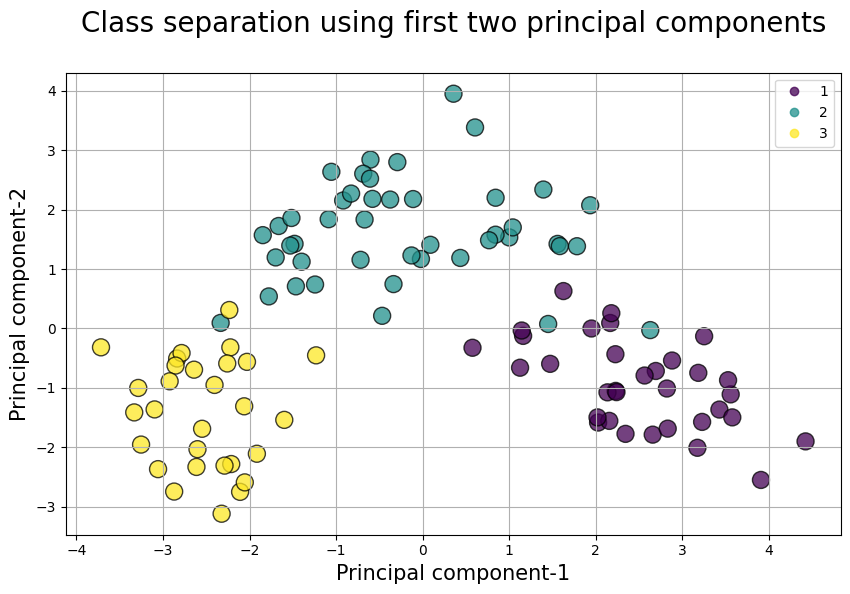

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_scaled_trans[0],X_train_scaled_trans[1],c=y_train,edgecolors='k',alpha=0.75,s=150)
classes = ['1', '2', '3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

It can be seen that first 2 principal compenent can separate the classes better than the 2 most correlated variable.

In [28]:
variables = ["Flavanoids", "OD280/OD315 of diluted wines"]

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
# Predict

y_pred = gnb.predict(X_test)

#Calculate Accuracy

accuracy_score(y_test,y_pred) # can be problem due to imbalanced dataset

1.0

Let's check how well model deals when using the first 2 principal compenent.

In [36]:
variables = [0,1] 

gnb_pca = GaussianNB()

gnb_pca.fit(X_train_scaled_trans[variables], y_train)

GaussianNB()

In [38]:
# Before predicting implement scaling and traformation to test dataset

X_test_scaled = scaler.transform(X_test)

X_test_scaled_trans = pca.transform(X_test_scaled)

/Users/burakbedir/Desktop/B/Project-Search-Docs/Principal-Component-Analysis/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [41]:
X_test_scaled_trans = pd.DataFrame(data=X_test_scaled_trans)

X_test_scaled_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.146099,-1.027215,-0.083873,0.170042,1.079263,1.161012,-0.509791,-0.279222,0.036770,-0.203114,-0.850188,-0.229731,0.023804
1,1.283214,-1.708952,0.073434,0.519084,0.174504,1.478607,-1.155341,-0.624302,-0.166996,0.163249,0.564033,-0.132523,0.225966
2,-2.620944,-0.358585,0.662336,-0.703308,-0.512910,0.496275,-0.470841,-0.734033,0.412199,0.342447,-0.494225,0.131199,-0.483748
3,2.595005,-0.912930,1.278634,-0.258089,-0.658812,-1.055257,-0.397495,0.869807,0.765439,-0.296697,0.546272,0.363185,0.244114
4,0.090144,2.394893,-1.375012,-0.356550,-0.002117,-0.704126,-1.025247,-0.410746,-0.501339,0.038399,0.315570,-1.318753,-0.188205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1.983586,-1.543787,-1.222328,0.084396,1.473992,0.511180,0.663065,-0.048948,0.674695,-0.204504,0.404648,-1.185899,-0.038368
68,1.123643,-0.710923,2.028294,-0.201906,0.159691,0.606680,0.191899,-0.032849,-0.174839,-0.036658,-0.521524,0.504986,-0.106123
69,1.687741,0.044568,-0.176782,-0.593436,-1.096212,0.451162,0.208018,0.527114,0.114438,0.407443,-0.100593,0.261014,0.224494
70,2.721096,-0.317237,0.754692,-0.864374,1.963838,1.095887,3.533369,1.958722,-0.067850,1.711065,0.597997,0.893183,-0.189196


In [42]:
# Predict and calculate accuracy

y_pred_trans = gnb_pca.predict(X_test_scaled_trans[variables])

accuracy_score(y_test, y_pred_trans) 

0.9444444444444444